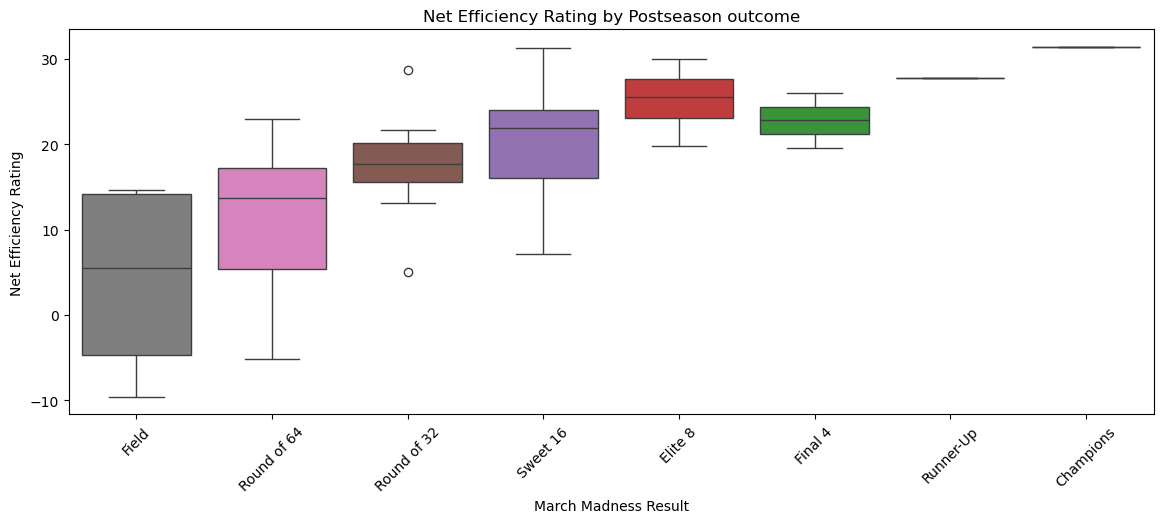

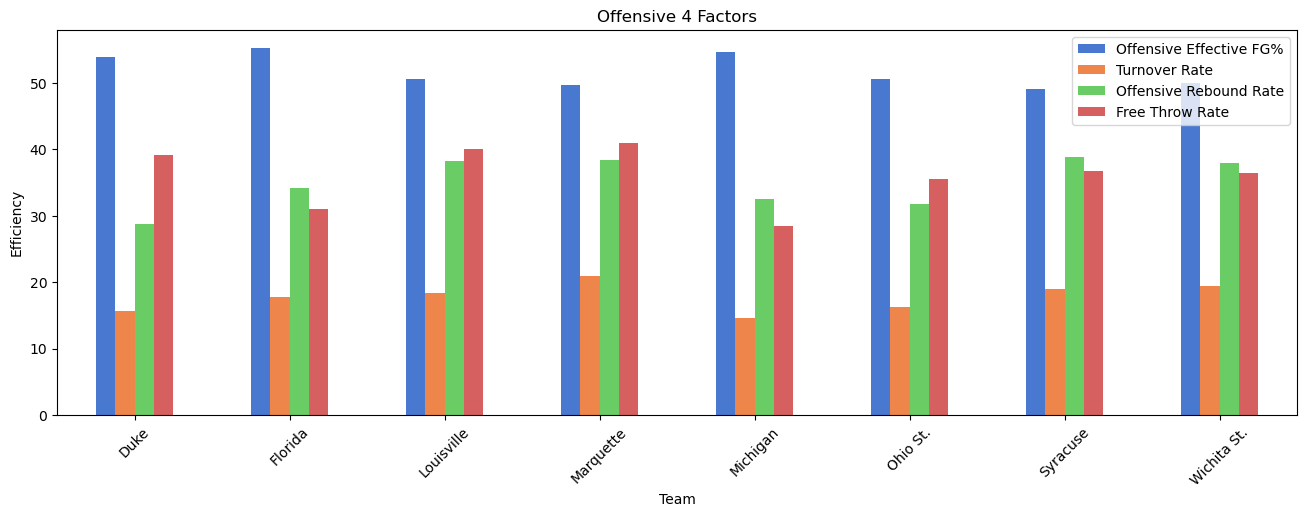

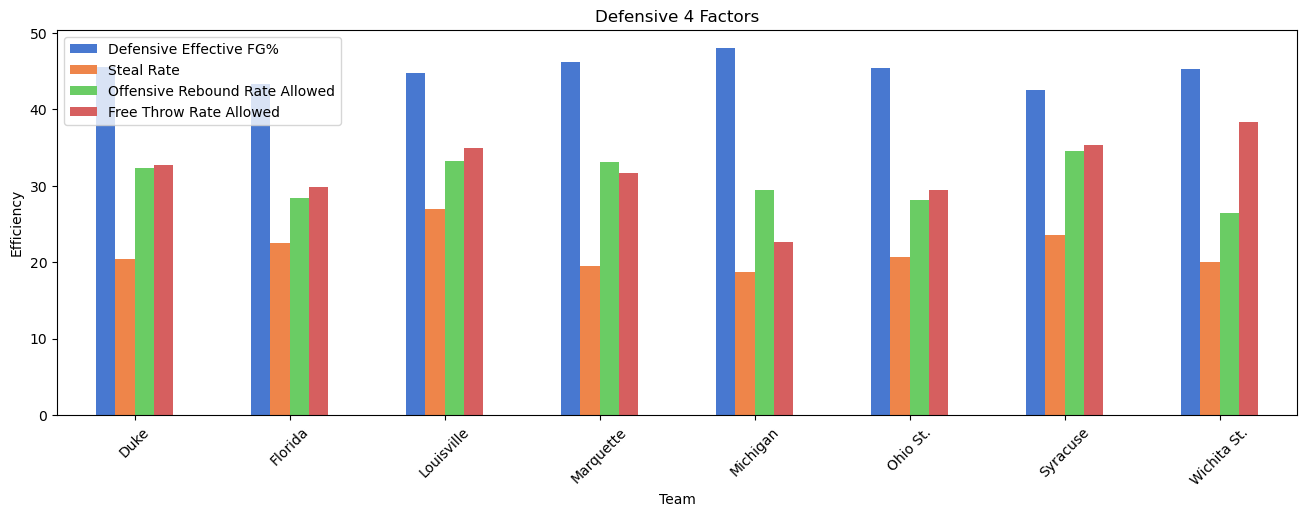

,Team,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Offensive Effective FG%,Defensive Effective FG%,Turnover Rate,Steal Rate,Offensive Rebound Rate,Offensive Rebound Rate Allowed,Free Throw Rate,Free Throw Rate Allowed,March Madness Result,Net Efficiency Rating
March Madness Result,,,,,,,,,,,,,
Champions,Louisville,115.9,84.5,50.6,44.8,18.3,27.0,38.2,33.3,40.0,34.9,Champions,31.4
Runner-Up,Michigan,121.5,93.7,54.6,48.0,14.6,18.7,32.5,29.4,28.4,22.7,Runner-Up,27.8
Final 4,Wichita St.,110.6,91.0,50.0,45.3,19.4,20.0,38.0,26.5,36.5,38.3,Final 4,19.6
Final 4,Syracuse,113.0,87.0,49.0,42.6,18.9,23.6,38.8,34.5,36.8,35.4,Final 4,26.0
Elite 8,Ohio St.,113.6,89.4,50.6,45.4,16.2,20.7,31.8,28.2,35.5,29.5,Elite 8,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Round of 64,North Carolina St.,115.2,98.0,54.2,46.8,18.0,16.6,34.7,32.6,40.9,29.0,Round of 64,17.2
Field,Middle Tennessee,105.1,91.0,51.1,44.4,20.7,23.6,36.5,29.0,41.4,42.8,Field,14.1
Field,Boise St.,112.0,97.4,51.8,51.4,18.4,20.0,30.3,24.4,33.7,42.2,Field,14.6


In [639]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df1 = pd.read_csv('Kaggle_Dataset.csv')
df2 = df1.copy()


# Task 1 - Clean Data
cleaned = df2.dropna(subset='SEED') # We only want teams that played in March Madness (a 'SEED' != NaN)
cleaned = cleaned.drop_duplicates(['TEAM']) # Make sure there are no duplicate teams that are being counted
cleaned['SEED'] = cleaned['SEED'].astype(int) # Changes seed in March Madness for each team from a float to int (seeds are only whole numbers)
conf_dict = {'B10':'Big 10',
             'WCC':'West Coast Conference',
             'B12':'Big 12',
             'BE':'Big East',
             'ACC':'Atlantic Coast Conference',
             'MWC':'Mountain West Conference',
             'SEC':'Southeastern Conference',
             'A10':'Atlantic 10',
             'P12':'Pac 12',
             'CUSA':'Confrence USA',
             'MVC':'Missouri Valley Conference',
             'OVC':'Ohio Valley Conference',
             'Pat':'Patriot Leauge',
             'SB':'Sun Belt',
             'MAC':'Mid-American Conference',
             'Sum':'Summit Leauge',
             'BSky':'Big Sky',
             'WAC':'Western Athletic Conference',
             'Slnd':'Southland',
             'Ivy':'Ivy Leauge',
             'SC':'Southern Conference',
             'Horz':'Horizon Leauge',
             'BW':'Big West',
             'MAAC':'Metro Atlantic Athletic Conference',
             'ASun':'ASUN',
             'AE':'American East',
             'MEAC':'Mid-Eastern Athletic Conference',
             'SWAC':'Southwestern Athletic Conference',
             'NEC':'Northeast Conference',
             'CAA':'Colonial Athletic Association',
             'BSth':'Big South Conference'}
cleaned['CONF'] = cleaned['CONF'].replace(conf_dict) # Change conference label into a more readable string
post_dict = {'R68':'Field', 'R64':'Round of 64', 'R32':'Round of 32', 'S16':'Sweet 16', 'E8':'Elite 8', 'F4':'Final 4', '2ND':'Runner-Up',
             'Champions':'Champions'}
cleaned['POSTSEASON'] = cleaned['POSTSEASON'].replace(post_dict) # Change the postseason column to a more readable string
cleaned = cleaned.rename(columns = {'TEAM':'Team',
             'POSTSEASON':'March Madness Result',
             'CONF':'Conference',
             'G':'Games Played',
             'W':'Games Won',
             'ADJOE':'Adjusted Offensive Efficiency',
             'ADJDE':'Adjusted Defensive Efficiency',
             'BARTHAG':'Power Rating',
             'EFG_O':'Offensive Effective FG%',
             'EFG_D':'Defensive Effective FG%',
             'TOR':'Turnover Rate',
             'TORD':'Steal Rate',
             'ORB':'Offensive Rebound Rate',
             'DRB':'Offensive Rebound Rate Allowed',
             'FTR':'Free Throw Rate',
             'FTRD':'Free Throw Rate Allowed',
             '2P_O':'2pt FG%',
             '2P_D':'2pt FG% Allowed',
             '3P_O':'3pt FG%',
             '3P_D':'3pt FG% Allowed',
             'ADJ_T':'Adjusted Tempo',
             'WAB':'Wins Above Bubble',
             'SEED':'March Madness Seed'}) # Rename columns for a more readable table
cleaned = cleaned.drop(['Conference', 'March Madness Seed', 'Power Rating', 'Games Won', 'Games Played', '2pt FG%', '2pt FG% Allowed', '3pt FG%', '3pt FG% Allowed', 'Adjusted Tempo', 'Wins Above Bubble'], axis=1)
# Drop the columns that are not needed for our analysis

# Task 2 - Restructure the data
structured = cleaned.set_index(['March Madness Result'], drop = False) # Sets the postseason result as the index
order = {'Champions':0, 'Runner-Up':1, 'Final 4':2, 'Elite 8':3, 'Sweet 16':4, 'Round of 32':5, 'Round of 64':6, 'Field':7}
rev_order = {'Field':0, 'Round of 64':1, 'Round of 32':2, 'Sweet 16':3, 'Elite 8':4, 'Final 4':5, 'Runner-Up':6, 'Champions':7}
# Create reverse order for table presentation
structured = structured.sort_index(level='March Madness Result', key=lambda x: x.map(order)) 
# A sort function that sorts by the 2nd index 'POSTSEASON' with a predefined order in variable 'order.' The order is the result of the team's postseason


# Task 3 - Apply aggregation and summarization methods
structured['Net Efficiency Rating'] = structured['Adjusted Offensive Efficiency'] - structured['Adjusted Defensive Efficiency']
# Create a new column that accounts for both offensive and defensive efficiencies
palette = sns.color_palette('muted', n_colors = 4) # Add custom palettes to fit aggregated visuals
fact_subset = structured.iloc[0:8] # Selecting only the top 8 rows from our index so we only get data on teams in the elite 8 or higher
off_factors = fact_subset.groupby('Team').agg({'Offensive Effective FG%':'sum', 
                                              'Turnover Rate':'sum', 
                                              'Offensive Rebound Rate':'sum',
                                              'Free Throw Rate':'sum'}) # Aggregate each of the 4 factors for offensive metrics
def_factors = fact_subset.groupby('Team').agg({'Defensive Effective FG%':'sum', 
                                              'Steal Rate':'sum', 
                                              'Offensive Rebound Rate Allowed':'sum',
                                              'Free Throw Rate Allowed':'sum'}) # Aggregate each of the 4 factors for defensive metrics


# Task 4 - Data Visulization
# Created a box plot in order to see a positive trend in efficiency by postseason result
plt.figure(figsize=(14, 5))
sns.boxplot(data = structured, x = 'March Madness Result', y = 'Net Efficiency Rating', hue = 'March Madness Result', order = rev_order)
plt.xticks(rotation=45)
plt.title('Net Efficiency Rating by Postseason outcome')
plt.show()

# Created a plot to see 4 Factors for offensive efficiency
off_factors.plot(kind = 'bar', figsize = (16, 5), color = palette)
plt.xticks(rotation=45)
plt.title('Offensive 4 Factors')
plt.ylabel('Efficiency')
plt.xlabel('Team')
plt.show()

# Created a plot to see 4 Factors for defensive efficiency
def_factors.plot(kind = 'bar', figsize = (16, 5), color = palette)
plt.xticks(rotation=45)
plt.title('Defensive 4 Factors')
plt.ylabel('Efficiency')
plt.xlabel('Team')
plt.show()



# Notes
#pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows', None)
display(structured)